<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/Neural_Networks/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen


import cv2 
import os


import warnings
warnings.filterwarnings('ignore')

img_size = 50


#Creating three manual pictures

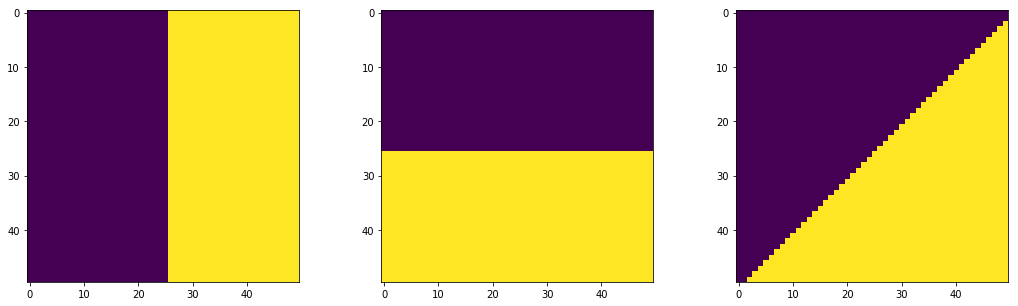

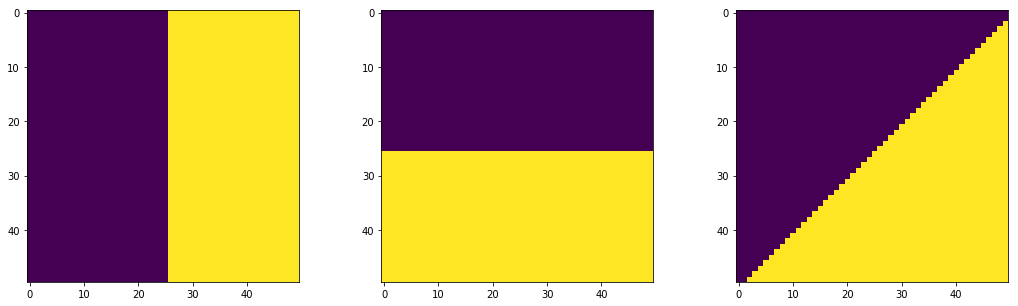

In [159]:
z_v = np.array([ [i>img_size/2 for i in range(img_size)] for j in range(img_size) ])
z_h = np.array([  [j>img_size/2 for i in range(img_size)] for j in range(img_size)  ])
z_45 = np.array([ [i+j>img_size for i in range(img_size)] for j in range(img_size) ])
z_list = [z_v, z_h, z_45]
fig = plt.figure(figsize=(18,5))

for i in range(3):
  ax = fig.add_subplot(1,3,i+1)
  ax.imshow(z_list[i])
  

In [0]:
kern_v = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kern_h = kern_v.T
kern_45 = np.array([[1,1,0],[1,0,-1],[0,-1,-1]])

kern_list  = [kern_v, kern_h, kern_45]

In [0]:
from scipy import ndimage

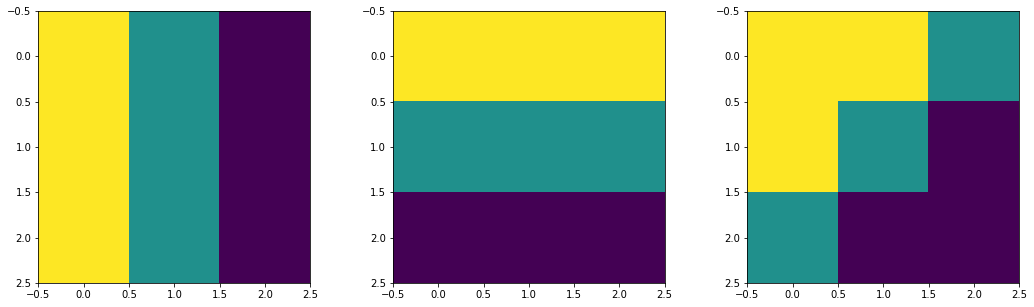

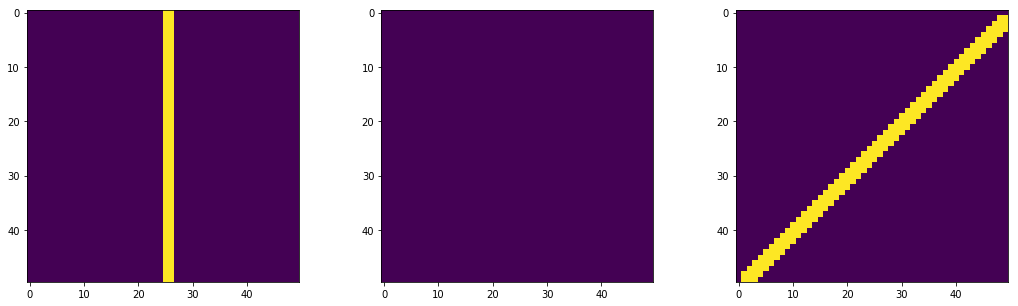

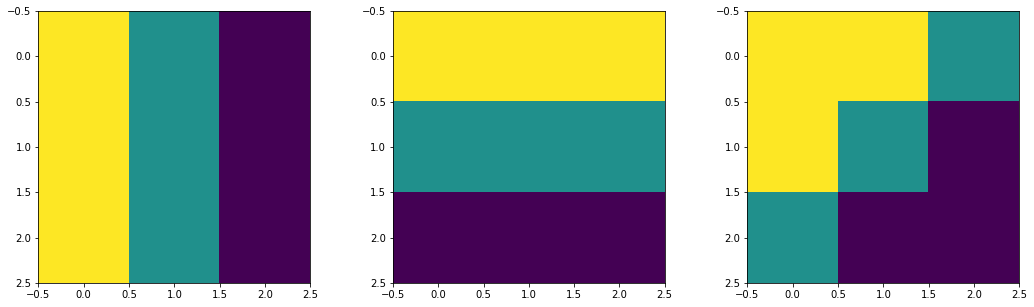

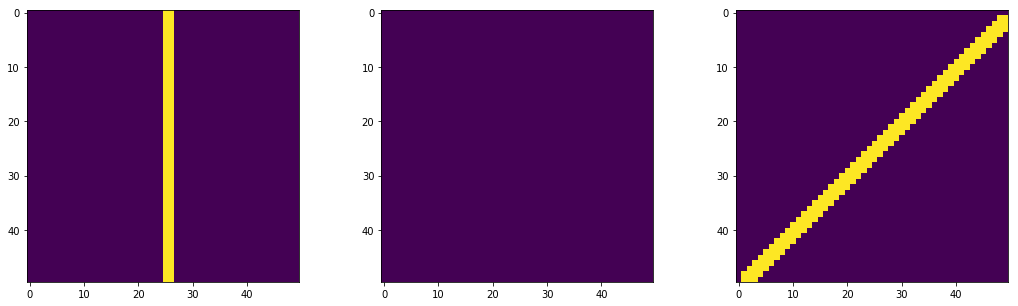

In [162]:
fig = plt.figure(figsize=(18,5))
for i in range(3):
  ax = fig.add_subplot(1,3,i+1)
  ax.imshow(kern_list[i])
                      
fig = plt.figure(figsize=(18,5))
for i in range(3):
  ax = fig.add_subplot(1,3,i+1)
  ax.imshow(ndimage.convolve(z_list[i], kern_v))

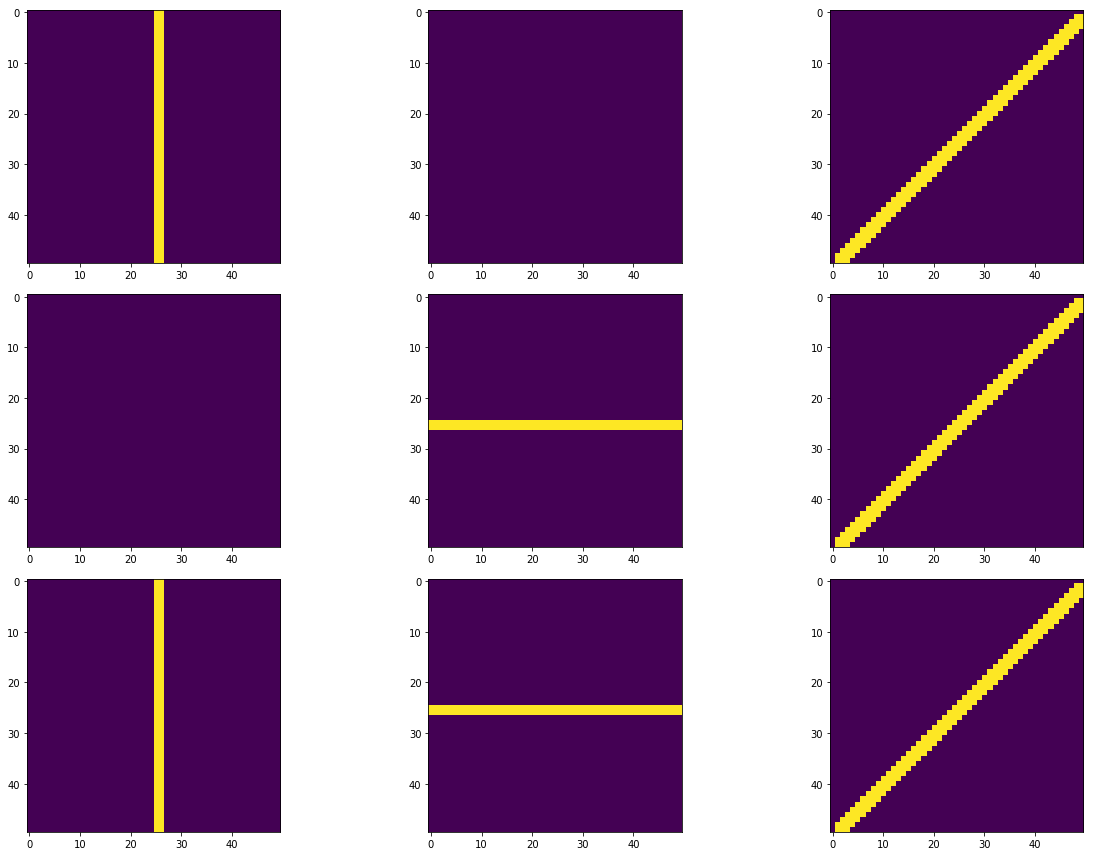

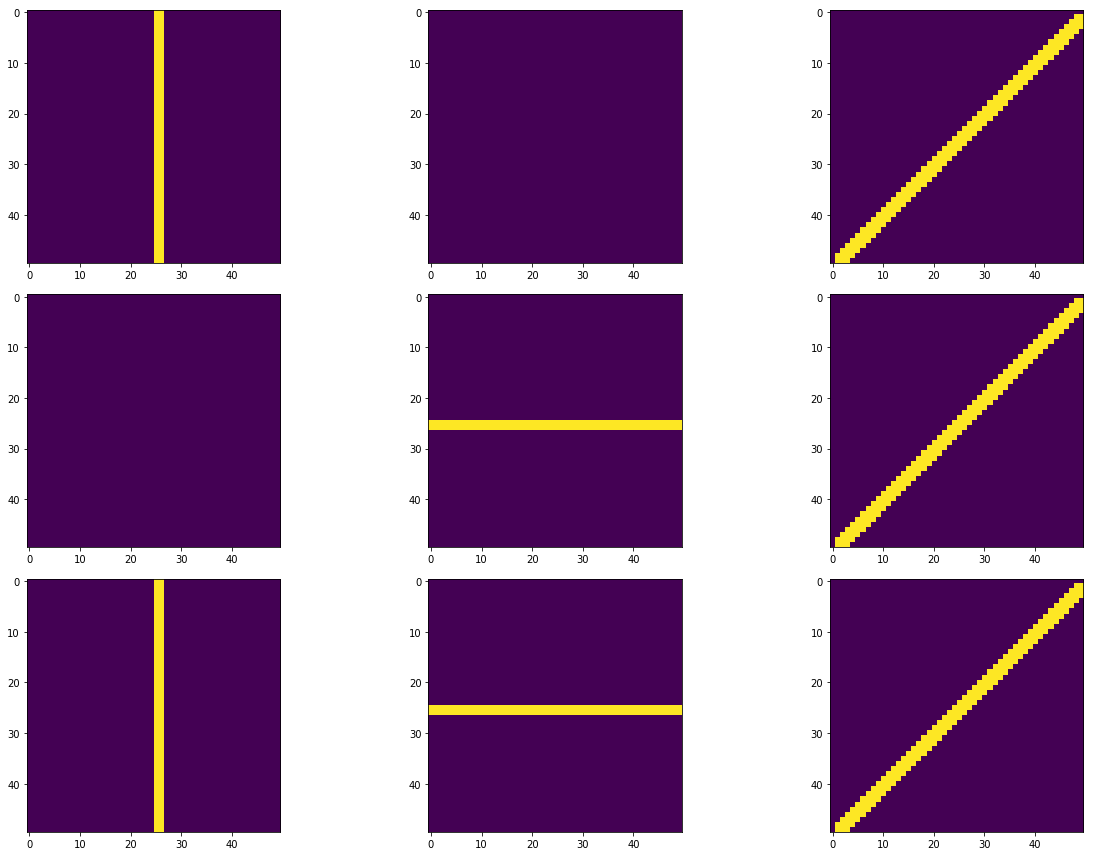

In [163]:
fig = plt.figure(figsize=(18,12))
for i in range(3):
  for j in range(3):
    ax = fig.add_subplot(3,3,i+3*j+1)
    ax.imshow(ndimage.convolve(z_list[i], kern_list[j]))
    
plt.tight_layout()


#Convolution operator

In [0]:
def conv(image, kern):
  n_v, n_h = image.shape[:2]
  f_v, f_h = kern.shape[:2]
  o_v = n_v - (f_v - 1)
  o_h = n_h - (f_h - 1)
  
  img = np.zeros((o_v, o_h))
  
  for i in range(o_v):
    for j in range(o_h):
      x = image[i:i+f_v, j:j+f_h]
      img[i,j] = np.sum(x*kern)
  
  return img
      

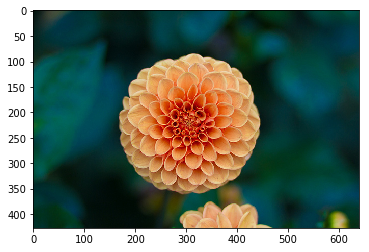

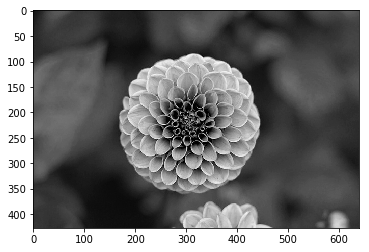

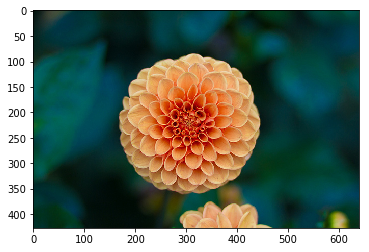

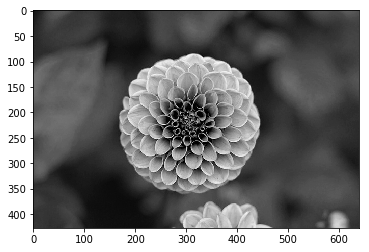

In [165]:
from sklearn.datasets import load_sample_image

flower = load_sample_image('flower.jpg')
plt.imshow(flower )
fig = plt.figure()
plt.imshow(flower[:,:,1] ,cmap='gray')

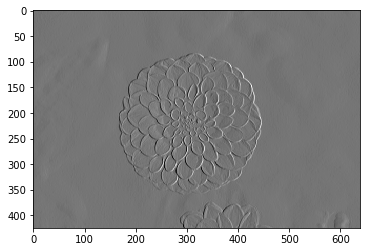

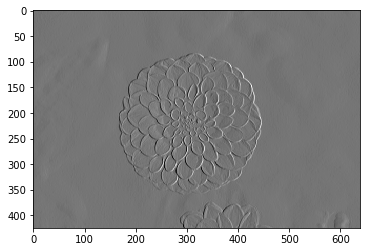

In [166]:
kernel = np.array([[1, 0, -1], [1, 0, -1],[1, 0, -1]])

plt.imshow(conv(flower[:,:,2], kernel), cmap='gray')

In [167]:
flower.shape

(427, 640, 3)

(427, 640, 3)

#Galaxy Zoo image classification

In [168]:
import io, requests, zipfile
import pandas as pd

url_x = "https://www.dropbox.com/s/optw30o55q6mxlw/Cropped%26resized_GS_100_10000_withlabels.npz?dl=1"
url_y = 'https://www.dropbox.com/s/ctjjap42qilhu9s/Y_1.csv?dl=1'

### This file contains classes and the ids. 
s=requests.get(url_y, stream=True).content
df = pd.read_csv(io.BytesIO(s), index_col=0) 

### This file contains images and the ids. 
s=requests.get(url_x, stream=True).content
# d = np.load(io.BytesIO(s))
X, ids = [np.load(io.BytesIO(s))[f] for f in ['imgs','ids']]
ids = ids.astype('float')

### We can make the labels based on the ids in the X file.
Y = df.loc[ids].values
print(Y.shape)

(10000, 3)
(10000, 3)


short about the data set :

10000 images with size 100*100 of the different galaxies

their labels are in the Y. The numbers in each columns indicates the probability that the galaxy to which class belongs

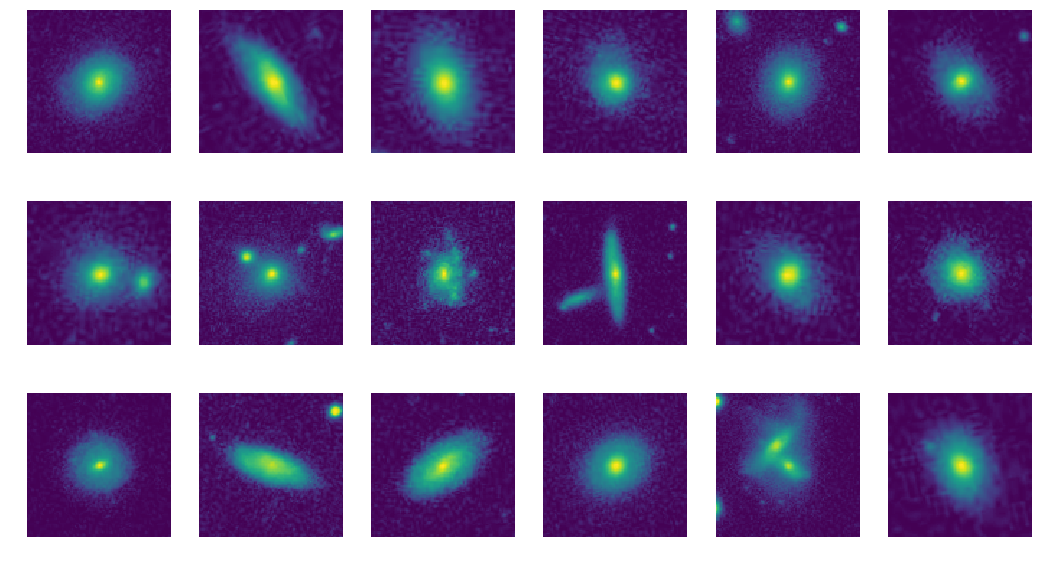

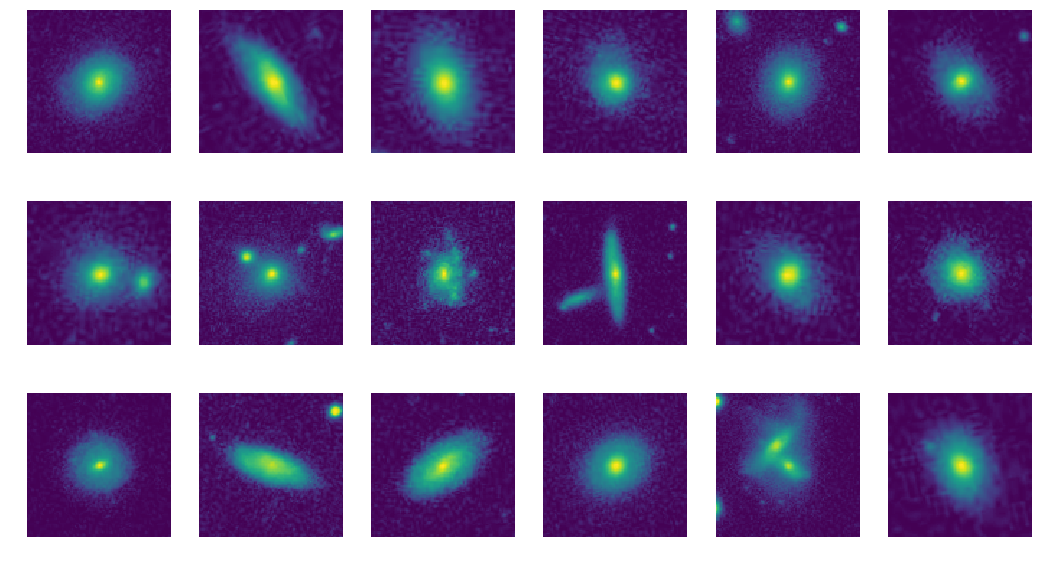

In [169]:
fig = plt.figure(figsize=(18,10))
for i in range(18):
  ax = fig.add_subplot(3,6,i+1)
  ax.imshow(X[i])
  ax.axis('off')

#Classification with neural network

In [0]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Scaling

In [0]:
scaler = StandardScaler()

X = X.reshape(-1,100*100)

X = scaler.fit_transform(X)

X = X.reshape(-1,100,100)

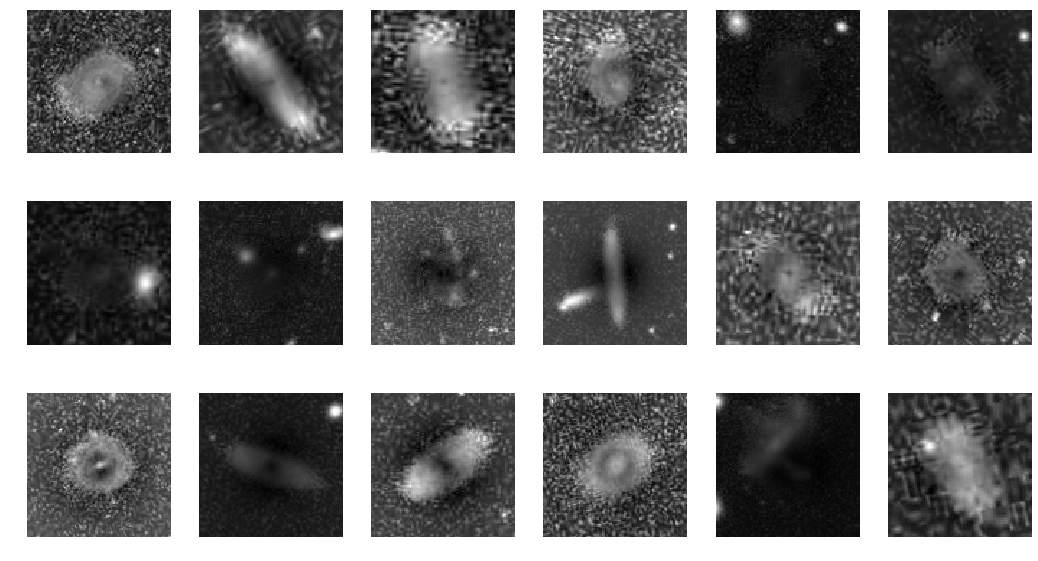

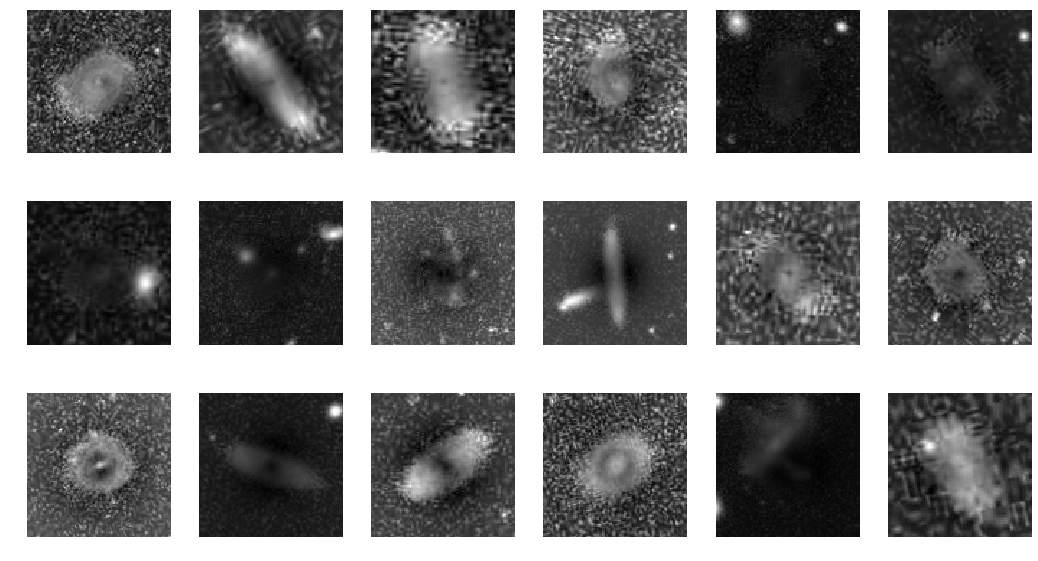

In [172]:
fig = plt.figure(figsize=(18,10))
for i in range(18):
  ax = fig.add_subplot(3,6,i+1)
  ax.imshow(X[i],cmap='gray')
  ax.axis('off')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

#Building Neural Network

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (100,100)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [175]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              10241024  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [177]:
his = model.fit(X_train, y_train, batch_size=50, epochs=5, validation_split=0.2)

Train on 6000 samples, validate on 1500 samples
Epoch 1/5
6000/6000 [==============================] - 23s 4ms/sample - loss: 0.9401 - acc: 0.5813 - val_loss: 0.8093 - val_acc: 0.6553
Epoch 2/5
6000/6000 [==============================] - 22s 4ms/sample - loss: 0.8044 - acc: 0.6258 - val_loss: 0.7888 - val_acc: 0.6707
Epoch 3/5
6000/6000 [==============================] - 22s 4ms/sample - loss: 0.7860 - acc: 0.6610 - val_loss: 0.7750 - val_acc: 0.6860
Epoch 4/5
6000/6000 [==============================] - 23s 4ms/sample - loss: 0.7706 - acc: 0.6928 - val_loss: 0.7707 - val_acc: 0.7380
Epoch 5/5
6000/6000 [==============================] - 23s 4ms/sample - loss: 0.7614 - acc: 0.7097 - val_loss: 0.7481 - val_acc: 0.7253
Train on 6000 samples, validate on 1500 samples
Epoch 1/5
6000/6000 [==============================] - 24s 4ms/sample - loss: 1.0091 - acc: 0.5630 - val_loss: 0.8230 - val_acc: 0.6433
Epoch 2/5
6000/6000 [==============================] - 24s 4ms/sample - loss: 0.8281 - a

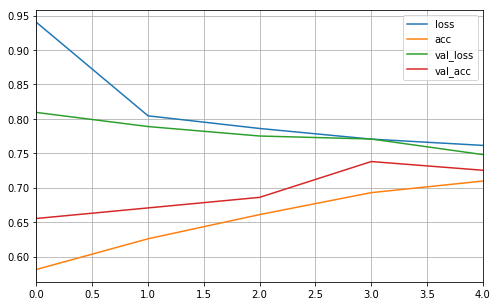

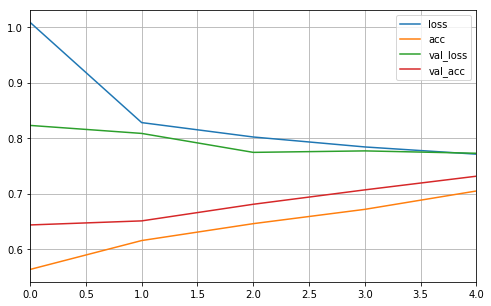

In [178]:
pd.DataFrame(his.history).plot(figsize=(8,5))
plt.grid(True)


In [180]:
model.evaluate(X_test, y_test)

2500/2500 [==============================] - 2s 892us/sample - loss: 0.7643 - acc: 0.7260


[0.7643240980148316, 0.726]